<a href="https://colab.research.google.com/github/Engyogesh/miniproject/blob/main/Miniproject_11_World_Economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
data= pd.read_excel(r'/content/gdrive/My Drive/mini project/WORLD ECONOMY.xlsx')
display(pd.DataFrame(data))
df = pd.DataFrame(data)

,GDP,country_name,year
0,0,USA,2015
1,1,USA,2016
2,2,USA,2017
3,3,USA,2018
4,4,USA,2019
5,5,USA,2020
6,6,China,2015
7,7,China,2016
8,8,China,2017
9,9,China,2018


In [16]:
odd_years = df[df['year'] % 2 != 0].groupby('country_name')['GDP'].mean().reset_index()
even_years = df[df['year'] % 2 == 0].groupby('country_name')['GDP'].mean().reset_index()
all_years = df.groupby('country_name')['GDP'].mean().reset_index()

odd_years['rank_odd'] = odd_years['GDP'].rank(ascending=False, method='dense')
even_years['rank_even'] = even_years['GDP'].rank(ascending=False, method='dense')
all_years['rank_all'] = all_years['GDP'].rank(ascending=False, method='dense')

odd_years.columns = ['country_name', 'avg_gdp_odd', 'rank_odd']
even_years.columns = ['country_name', 'avg_gdp_even', 'rank_even']
all_years.columns = ['country_name', 'avg_gdp_all', 'rank_all']

merged_df = odd_years.merge(even_years, on='country_name').merge(all_years, on='country_name')

**1)For each country, print Top 10 highest average GDP values accounting only the odd years GDPs.
Output:
country_name, avg_gdp_odd,rank_odd**

In [27]:
print("Top 10 highest average GDP values (Odd Years):")
print(tabulate(odd_years.nlargest(10, 'avg_gdp_odd'), headers='keys', tablefmt='plain'))
print("\n")

Top 10 highest average GDP values (Odd Years):
    country_name      avg_gdp_odd    rank_odd
 1  Canada                     56           1
 6  Italy                      50           2
 0  Brazil                     44           3
 3  France                     38           4
 7  Japan                      32           5
 8  UK                         26           6
 4  Germany                    20           7
 5  India                      14           8
 2  China                       8           9
 9  USA                         2          10




**2)For each country, print Top 10 highest average GDP values accounting only the even years GDPs.
Output:
country_name, avg_gdp_even,rank_even**


In [25]:
print("Top 10 highest average GDP values (Even Years):")
print(tabulate(even_years.nlargest(10, 'avg_gdp_even'), headers='keys', tablefmt='plain'))
print("\n")

Top 10 highest average GDP values (Even Years):
    country_name      avg_gdp_even    rank_even
 1  Canada                      57            1
 6  Italy                       51            2
 0  Brazil                      45            3
 3  France                      39            4
 7  Japan                       33            5
 8  UK                          27            6
 4  Germany                     21            7
 5  India                       15            8
 2  China                        9            9
 9  USA                          3           10




**3)For each country, print Top 10 highest average GDP values accounting all the years.
Output:
country_name, avg_gdp_all,rank_all**


In [24]:
print("Top 10 highest average GDP values (All Years):")
print(tabulate(all_years.nlargest(10, 'avg_gdp_all'), headers='keys', tablefmt='plain'))
print("\n")

Top 10 highest average GDP values (All Years):
    country_name      avg_gdp_all    rank_all
 1  Canada                   56.5           1
 6  Italy                    50.5           2
 0  Brazil                   44.5           3
 3  France                   38.5           4
 7  Japan                    32.5           5
 8  UK                       26.5           6
 4  Germany                  20.5           7
 5  India                    14.5           8
 2  China                     8.5           9
 9  USA                       2.5          10




**4)Merge 1-3 above.
Output:
country_name, avg_gdp_odd, rank_odd, avg_gdp_even, rank_even,avg_gdp_all,rank_all**



In [21]:
print("\nMerged GDP Data (Odd, Even, and All Years)")
print(merged_df.nlargest(10, 'avg_gdp_all').to_string(index=False))


Merged GDP Data (Odd, Even, and All Years)
country_name  avg_gdp_odd  rank_odd  avg_gdp_even  rank_even  avg_gdp_all  rank_all
      Canada         56.0       1.0          57.0        1.0         56.5       1.0
       Italy         50.0       2.0          51.0        2.0         50.5       2.0
      Brazil         44.0       3.0          45.0        3.0         44.5       3.0
      France         38.0       4.0          39.0        4.0         38.5       4.0
       Japan         32.0       5.0          33.0        5.0         32.5       5.0
          UK         26.0       6.0          27.0        6.0         26.5       6.0
     Germany         20.0       7.0          21.0        7.0         20.5       7.0
       India         14.0       8.0          15.0        8.0         14.5       8.0
       China          8.0       9.0           9.0        9.0          8.5       9.0
         USA          2.0      10.0           3.0       10.0          2.5      10.0


**5)Group bar Plot from 4 above to top 5 countries by rank_all. Y-axis shows the average GDP figure for the country
X-axis -> country_name
Bar 1 -> avg_gdp_odd
Bar 2 -> avg_gdp_even
Bar 3 -> avg_gdp_all**

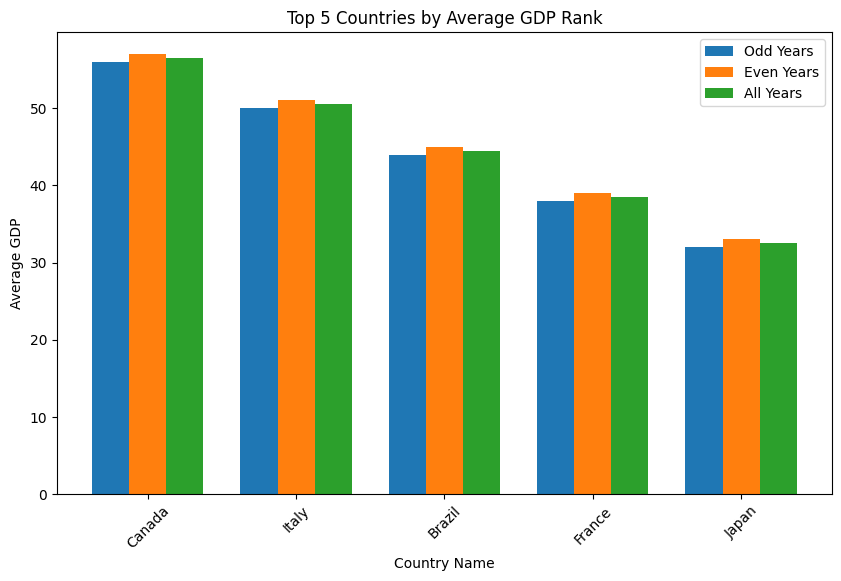

In [30]:
top5 = merged_df.nsmallest(5, 'rank_all')
plt.figure(figsize=(10, 6))
bar_width = 0.25

x = np.arange(len(top5['country_name']))
plt.bar(x - bar_width, top5['avg_gdp_odd'], width=bar_width, label='Odd Years')
plt.bar(x, top5['avg_gdp_even'], width=bar_width, label='Even Years')
plt.bar(x + bar_width, top5['avg_gdp_all'], width=bar_width, label='All Years')

plt.xticks(ticks=x, labels=top5['country_name'], rotation=45)
plt.xlabel('Country Name')
plt.ylabel('Average GDP')
plt.title('Top 5 Countries by Average GDP Rank')
plt.legend()
plt.show()

**6)From 8 above, take only the top 5 by rank_19_20 and group bar plot.
X-axis -> country_name_19_20
Bar 1 -> avg_gdp_17_18
Bar 2 -> avg_gdp_19_20**


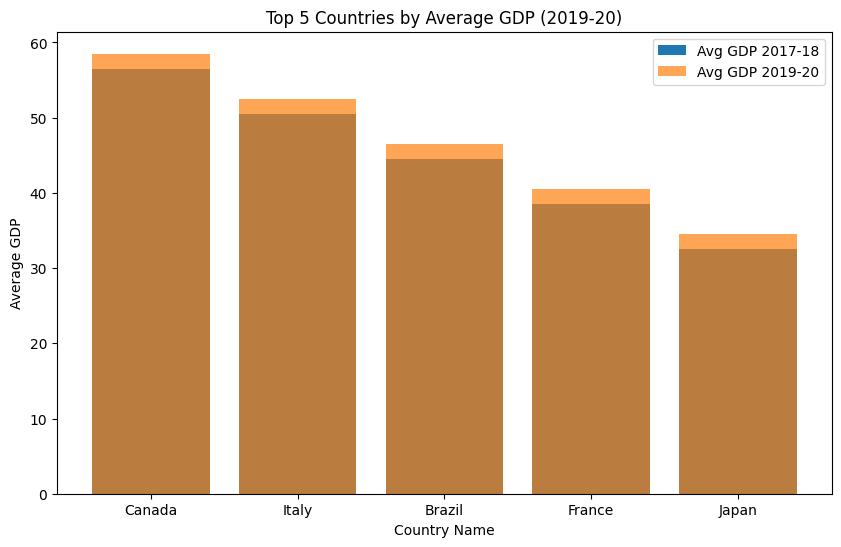

In [49]:
top5_19_20 = top10_merged.nsmallest(5, 'rank_19_20')
plt.figure(figsize=(10, 6))
plt.bar(top5_19_20['country_name_19_20'], top5_19_20['avg_gdp_17_18'], label='Avg GDP 2017-18')
plt.bar(top5_19_20['country_name_19_20'], top5_19_20['avg_gdp_19_20'], label='Avg GDP 2019-20', alpha=0.7)
plt.xlabel('Country Name')
plt.ylabel('Average GDP')
plt.title('Top 5 Countries by Average GDP (2019-20)')
plt.legend()
plt.show()

**7)Average GDP between the years 2019 and 2020. Print top 10 countries by the average calculated.
Output:
country_name_19_20, avg_gdp_19_20, rank_19_20
Average GDP between the years 2017 and 2018. Print top 10 countries by the average calculated.
Output:
country_name_17_18, avg_gdp_17_18, rank_17_18**


In [48]:
df_19_20 = df[df['year'].isin([2019, 2020])].groupby('country_name')['GDP'].mean().reset_index()
df_19_20['rank_19_20'] = df_19_20['GDP'].rank(ascending=False, method='dense')
df_19_20.columns = ['country_name_19_20', 'avg_gdp_19_20', 'rank_19_20']

df_17_18 = df[df['year'].isin([2017, 2018])].groupby('country_name')['GDP'].mean().reset_index()
df_17_18['rank_17_18'] = df_17_18['GDP'].rank(ascending=False, method='dense')
df_17_18.columns = ['country_name_17_18', 'avg_gdp_17_18', 'rank_17_18']

print("\nTop 5 Countries by Average GDP (2019-20)")
print(top5_19_20.to_string(index=False))


Top 5 Countries by Average GDP (2019-20)
country_name_17_18  avg_gdp_17_18  rank_17_18 country_name_19_20  avg_gdp_19_20  rank_19_20
            Canada           56.5         1.0             Canada           58.5         1.0
             Italy           50.5         2.0              Italy           52.5         2.0
            Brazil           44.5         3.0             Brazil           46.5         3.0
            France           38.5         4.0             France           40.5         4.0
             Japan           32.5         5.0              Japan           34.5         5.0


**8)Merge 6 and 7 on rank (only top 10 ranked).
Output:
rank, country_name_17_18, avg_gdp_17_18, country_name_19_20, avg_gdp_19_20, rank_19_20**

In [47]:
top10_merged = df_17_18.merge(df_19_20, left_on='rank_17_18', right_on='rank_19_20').head(10)
print("\nTop 10 Countries by Average GDP (2017-18 & 2019-20) - Merged")
print(top10_merged.to_string(index=False))


Top 10 Countries by Average GDP (2017-18 & 2019-20) - Merged
country_name_17_18  avg_gdp_17_18  rank_17_18 country_name_19_20  avg_gdp_19_20  rank_19_20
            Brazil           44.5         3.0             Brazil           46.5         3.0
            Canada           56.5         1.0             Canada           58.5         1.0
             China            8.5         9.0              China           10.5         9.0
            France           38.5         4.0             France           40.5         4.0
           Germany           20.5         7.0            Germany           22.5         7.0
             India           14.5         8.0              India           16.5         8.0
             Italy           50.5         2.0              Italy           52.5         2.0
             Japan           32.5         5.0              Japan           34.5         5.0
                UK           26.5         6.0                 UK           28.5         6.0
               USA

**1)Credit Card Fraud Detection: Credit Card Fraud classification using MLP Classifier. Column value to be classified is in column "Is_fraud" and all other columns are the features. Use two-fold cross validation and evaluation metrics: Precision, Recall, F1-score, Accuracy [wiki]. Also print confusion matrix [wiki].**

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Generate synthetic dataset
np.random.seed(42)
n_samples = 5000
n_features = 10

data = {
    f'feature_{i}': np.random.rand(n_samples) for i in range(n_features)
}
data['Is_fraud'] = np.random.randint(0, 2, size=n_samples)  # Binary classification

df = pd.DataFrame(data)
display(pd.DataFrame(data))

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,Is_fraud
0,0.374540,0.393636,0.373641,0.499670,0.729998,0.092371,0.638145,0.609393,0.298912,0.329932,0
1,0.950714,0.473436,0.332912,0.746747,0.184512,0.060754,0.459292,0.038903,0.094818,0.816738,1
2,0.731994,0.854547,0.176154,0.562667,0.346640,0.604192,0.964499,0.612260,0.126359,0.994377,1
3,0.598658,0.340004,0.607267,0.083303,0.663281,0.966116,0.218978,0.089669,0.180671,0.840762,1
4,0.156019,0.869650,0.476624,0.185580,0.482089,0.502721,0.587856,0.710344,0.203653,0.346143,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.897397,0.857656,0.650883,0.877039,0.327487,0.952275,0.434404,0.754034,0.193418,0.622445,1
4996,0.119381,0.897509,0.177798,0.046814,0.726966,0.747824,0.463577,0.764527,0.319452,0.226194,0
4997,0.327843,0.946708,0.051240,0.303698,0.923274,0.019456,0.529667,0.269569,0.353408,0.748995,1
4998,0.815745,0.397488,0.682962,0.443320,0.637286,0.401005,0.967568,0.434320,0.286822,0.521011,1


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision: 0.5156833457804332
Recall: 0.5495423796259451
F1-score: 0.5320747447505297
Accuracy: 0.5142
Confusion Matrix:
 [[1190 1297]
 [1132 1381]]

Evaluation Metrics DataFrame:
   Metric    Value
Precision 0.515683
   Recall 0.549542
 F1-score 0.532075
 Accuracy 0.514200


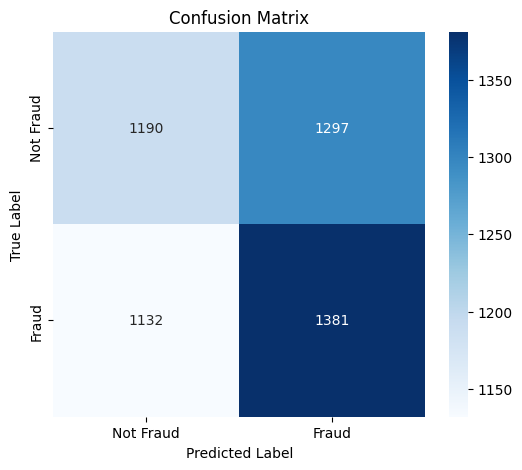

In [54]:
X = df.drop(columns=['Is_fraud'])
y = df['Is_fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
y_pred = cross_val_predict(mlp, X_scaled, y, cv=skf)

precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

results_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
})
print("\nEvaluation Metrics DataFrame:")
print(results_df.to_string(index=False))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
